<a href="https://colab.research.google.com/github/jessica306aa/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
print(df.head())
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [26]:
#先處理數值資料
numeric_data = df.select_dtypes(include=['int', 'float'])
#將要預測的Survived值先剔除
numeric_data = numeric_data.drop(columns='Survived',axis = 1)
print(numeric_data)

     PassengerId  Pclass   Age  SibSp  Parch     Fare
0              1       3  22.0      1      0   7.2500
1              2       1  38.0      1      0  71.2833
2              3       3  26.0      0      0   7.9250
3              4       1  35.0      1      0  53.1000
4              5       3  35.0      0      0   8.0500
..           ...     ...   ...    ...    ...      ...
886          887       2  27.0      0      0  13.0000
887          888       1  19.0      0      0  30.0000
888          889       3   NaN      1      2  23.4500
889          890       1  26.0      0      0  30.0000
890          891       3  32.0      0      0   7.7500

[891 rows x 6 columns]


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

target_column = 'Age'
features = numeric_data.drop(columns=[target_column])

# 分割資料集為訓練集和測試集
train_data = numeric_data.dropna()  # 刪除含有缺失值的行，作為訓練集
test_data = numeric_data[numeric_data[target_column].isnull()]  # 選取含有缺失值的行，作為測試集

# 分割特徵和目標變數
X_train = train_data.drop(columns=[target_column])
y_train = train_data[target_column]
X_test = test_data.drop(columns=[target_column])

# 初始化機器學習模型
model = RandomForestRegressor()

# 訓練模型
model.fit(X_train, y_train)

# 使用訓練好的模型進行預測
predicted_values = model.predict(X_test)

# 填充缺失值
test_data[target_column] = predicted_values

# 合併訓練集和填充後的測試集
filled_data = pd.concat([train_data, test_data])
final_numeric_data = pd.concat([filled_data,df['Survived']], axis = 1)
final_numeric_data.head(5)

<ipython-input-30-0bf38d485abb>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[target_column] = predicted_values


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,1,3,22.0,1,0,7.2500,0
1,2,1,38.0,1,0,71.2833,1
2,3,3,26.0,0,0,7.9250,1
3,4,1,35.0,1,0,53.1000,1
4,5,3,35.0,0,0,8.0500,0


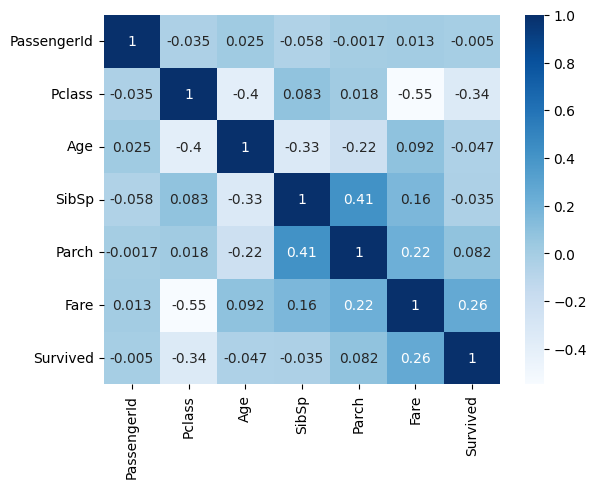

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(final_numeric_data.corr(),annot = True, cmap = 'Blues')
plt.show()

In [42]:
from scipy.stats import chi2_contingency
category_data = df.loc[:,["Sex","Survived"]]
crosstab_sex_survive = pd.crosstab(category_data['Sex'], category_data['Survived'])
crosstab_sex_survive
chi2, p, dof, expected = chi2_contingency(crosstab_sex_survive)

# 計算 Phi 係數
phi = np.sqrt(chi2 / np.sum(crosstab_sex_survive))

print("Phi 係數:", phi)

Phi 係數: Survived
0    0.689126
1    0.873115
dtype: float64
